Importación de librerías: Se importan las librerías pandas para manejar datos en formato de tablas y matplotlib.pyplot para crear gráficos

In [ ]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt

Lectura del archivo Excel: Se lee el archivo Excel llamado "Status_Licencias.xlsx" y se almacena en un DataFrame llamado df

In [ ]:
# Leo el archivo Excel
df = pd.read_excel("Status_Licencias.xlsx")

Limpieza de datos: Se reemplazan los valores NaN (valores faltantes) por 0 y los símbolos ✓ por 1. Esto facilita el conteo de licencias asignadas.
(Esto es util cuando tengo un arhivo con valores string, si no le asigno valores numericos como 0 o 1 no voy a poder realizar calculos)


In [ ]:
# Reemplazar valores ✓ por 1 y NaN por 0 para hacer conteos
df = df.fillna(0).replace("✔", 1)

Conteo de licencias: Se suman los valores de las columnas desde la tercera en adelante (iloc[:, 2:]), lo que da el número de usuarios que tienen cada licencia.

In [ ]:
# Contar cuántos usuarios tienen cada licencia
licencias = df.iloc[:, 2:].sum()

Total de licencias asignadas: Se suma el total de licencias asignadas a usuarios y se le asigna una nueva variable para guardar el resultado "total_licencias_asignadas"

In [ ]:
# Calcular el total de licencias asignadas a usuarios
total_licencias_asignadas = licencias.sum()  # Total de licencias asignadas a usuarios

Impresión de conteos: Se imprimen los conteos de usuarios por licencia.

In [ ]:
# Mostrar los conteos por licencia
print(licencias)

Creación del gráfico de barras: Se crea una figura de tamaño 10x6 pulgadas y se genera un gráfico de barras con los datos de licencias

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = licencias.plot(kind="bar", color="skyblue")

Si ejecutara el codigo hasta aca, este seria el resultado:
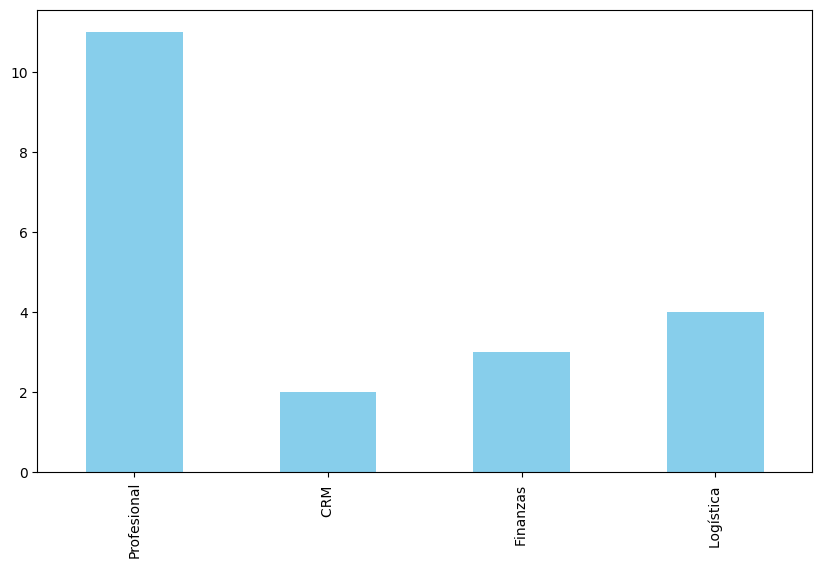

Personalización del gráfico: Se añade un título, etiquetas para los ejes X e Y, se asegura que las etiquetas del eje X no estén rotadas y se añade una cuadrícula en el eje Y.

In [ ]:
# Personalizar el gráfico
plt.title("Cantidad de Usuarios por Licencia")
plt.xlabel("Licencia")
plt.ylabel("Número de Usuarios")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

Texto sobre las barras: Se itera sobre los valores de las licencias y se coloca el número de usuarios por encima de cada barra.

In [ ]:
# Agregar el número de usuarios por encima de cada columna
for i, v in enumerate(licencias):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

Nombres de usuarios dentro de las barras: Se itera sobre las columnas de licencias, se obtienen los nombres de los usuarios que tienen cada licencia y se colocan dentro de las barras, ajustando la posición vertical para evitar solapamientos.

In [ ]:
# Agregar nombres de usuarios dentro de cada columna, ajustando la posición vertical
for i, col in enumerate(df.columns[2:]):
    usuarios = df[df[col] == 1].iloc[:, 0].tolist()
    usuarios_text = "\n".join(usuarios)
    # Ajustar la posición vertical en función del valor de la barra
    posicion_vertical = licencias[i] * 0.2  # Ajusta este factor según sea necesario
    ax.text(i, posicion_vertical, usuarios_text, ha='center', va='center', fontsize=8, color='black')

Información adicional: Se añade un texto en la parte superior del gráfico con el total de licencias y la cantidad de licencias asignadas, utilizando un fondo blanco para mejorar la legibilidad.

In [ ]:
# Agregar información adicional en la parte superior del gráfico
info_texto = f"Total de Licecias : {20}\nCantidad de Licencias Asignadas: {total_licencias_asignadas}"
plt.text(0.8, 0.9, info_texto, ha='center', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

Mostrar el gráfico: Se ajusta el layout para que todo el contenido quede bien organizado y se muestra el gráfico.

In [ ]:
# Mostrar el gráfico
plt.tight_layout()
plt.show()

CODIGO COMPLETO

In [ ]:
# Importo librerías
import pandas as pd
import matplotlib.pyplot as plt

# Leo el archivo Excel
df = pd.read_excel("Status_Licencias.xlsx")

# Reemplazar valores ✓ por 1 y NaN por 0 para hacer conteos
df = df.fillna(0).replace("✔", 1)

# Contar cuántos usuarios tienen cada licencia
licencias = df.iloc[:, 2:].sum()

# Calcular el total de licencias asignadas a usuarios
total_licencias_asignadas = licencias.sum()  # Total de licencias asignadas a usuarios

# Mostrar los conteos por licencia
print(licencias)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = licencias.plot(kind="bar", color="skyblue")

# Personalizar el gráfico
plt.title("Cantidad de Usuarios por Licencia")
plt.xlabel("Licencia")
plt.ylabel("Número de Usuarios")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Agregar el número de usuarios por encima de cada columna
for i, v in enumerate(licencias):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Agregar nombres de usuarios dentro de cada columna, ajustando la posición vertical
for i, col in enumerate(df.columns[2:]):
    usuarios = df[df[col] == 1].iloc[:, 0].tolist()
    usuarios_text = "\n".join(usuarios)
    # Ajustar la posición vertical en función del valor de la barra
    posicion_vertical = licencias[i] * 0.2  # Ajusta este factor según sea necesario
    ax.text(i, posicion_vertical, usuarios_text, ha='center', va='center', fontsize=8, color='black')

# Agregar información adicional en la parte superior del gráfico
info_texto = f"Total de Licecias : {20}\nCantidad de Licencias Asignadas: {total_licencias_asignadas}"
plt.text(0.8, 0.9, info_texto, ha='center', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Mostrar el gráfico
plt.tight_layout()
plt.show()